#  Görüntü İşleme Final Ödevi

####    Kullanılan Paketler

In [31]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np 
import math

####    Görüntüyü Python Ortamında Çalıştırma

(-0.5, 941.5, 902.5, -0.5)

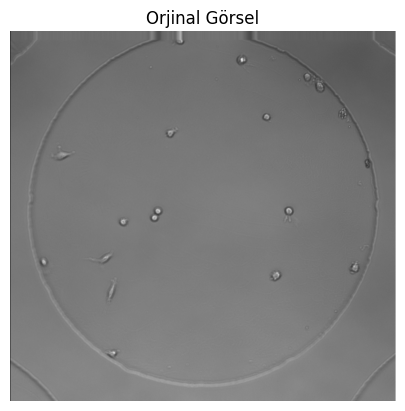

In [59]:
img = cv2.imread("/Users/buketcalp/Downloads/FINAL/hucre.png")

plt.imshow(img, cmap='gray')
plt.title('Orjinal Görsel')
plt.axis('off')

### 1.Soru

#### Keskinleştirme İşleminin Uygulaması

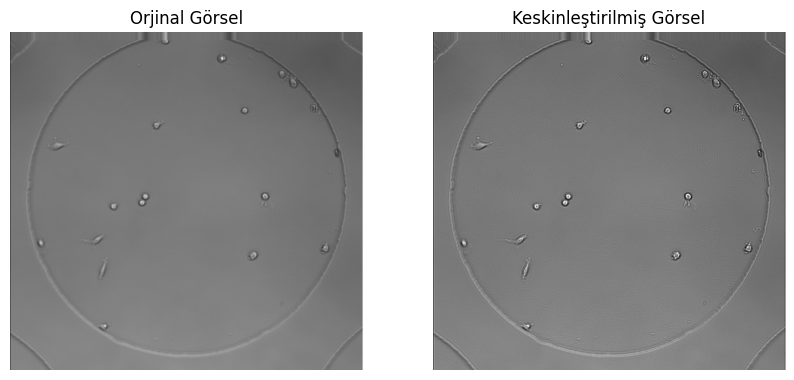

In [33]:
blurred_image = cv2.GaussianBlur(img, (3, 3), 0)
kernel = np.array([[-1, -1, -1], [-1,  9, -1], [-1, -1, -1]])
sharpened_image = cv2.filter2D(src=blurred_image, ddepth=-1, kernel=kernel)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Orjinal Görsel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Keskinleştirilmiş Görsel')
plt.axis('off')
plt.show()

###   2.Soru

#### Görüntüye En Uygun Eşikleme Yöntemini Bulma 

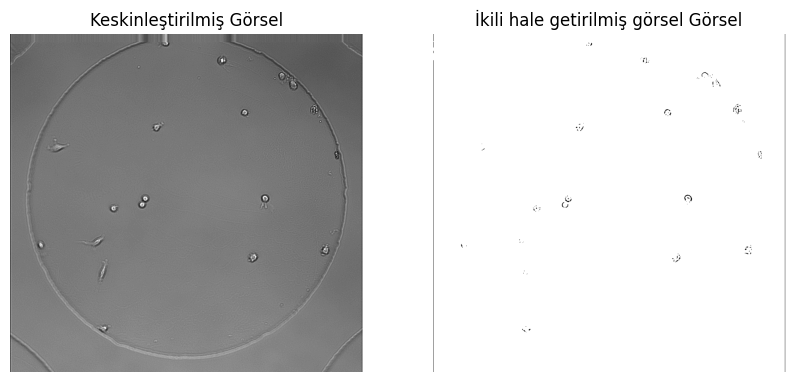

In [34]:
gray_image = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)
binary_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                              cv2.THRESH_BINARY, 17, 45)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Keskinleştirilmiş Görsel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('İkili hale getirilmiş görsel Görsel')
plt.axis('off')
plt.show()

### 3.Soru 

####    Erezyon ve Morfolojik Operasyonların uygulanması

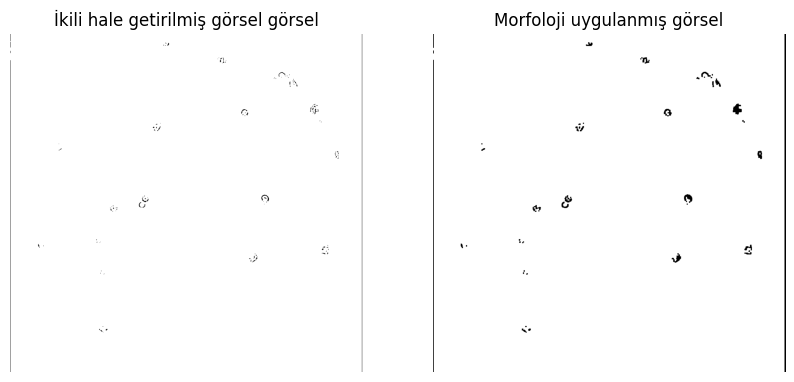

In [52]:
kernel1 = np.ones((5,5), np.uint8)
eroded_img = cv2.erode(binary_image, kernel1, iterations=1)
kernel2 = np.ones((3,3),np.uint8)
dilated_img = cv2.dilate(eroded_img, kernel2, iterations = 1)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('İkili hale getirilmiş görsel görsel')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_img, cmap='gray')
plt.title('Morfoloji uygulanmış görsel')
plt.axis('off')
plt.show()

###   4.soru

#### Connected component labeling algoritması uygulama

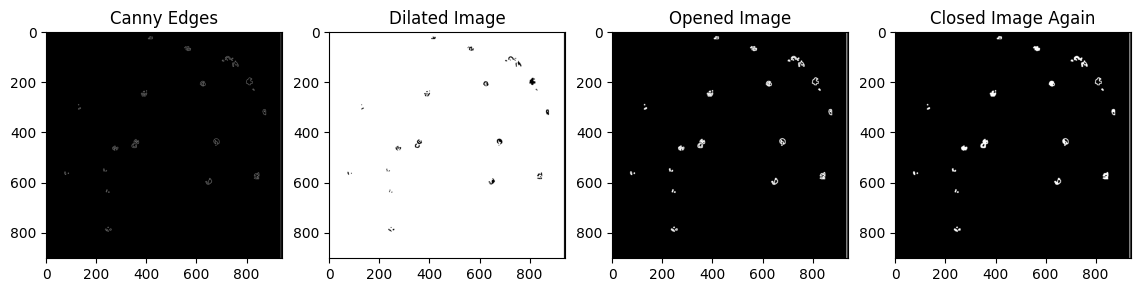

In [53]:
canny_edges = cv2.Canny(dilated_img, 100, 200)
kernel = np.ones((3, 3), np.uint8)
dilated_img_2 = cv2.dilate(canny_edges, kernel, iterations=1)
opened_img = cv2.morphologyEx(dilated_img_2, cv2.MORPH_OPEN, kernel)
closed_img = cv2.morphologyEx(opened_img, cv2.MORPH_CLOSE, kernel)
closed_img_again = cv2.morphologyEx(closed_img, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(14, 10))
plt.subplot(141), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(142), plt.imshow(dilated_img, cmap='gray'), plt.title('Dilated Image')
plt.subplot(143), plt.imshow(opened_img, cmap='gray'), plt.title('Opened Image')
plt.subplot(144), plt.imshow(closed_img_again, cmap='gray'), plt.title('Closed Image Again')
plt.show()

### 5.Soru

####    Algılanan Nesneleri Farklı Renklerle Gösterme 

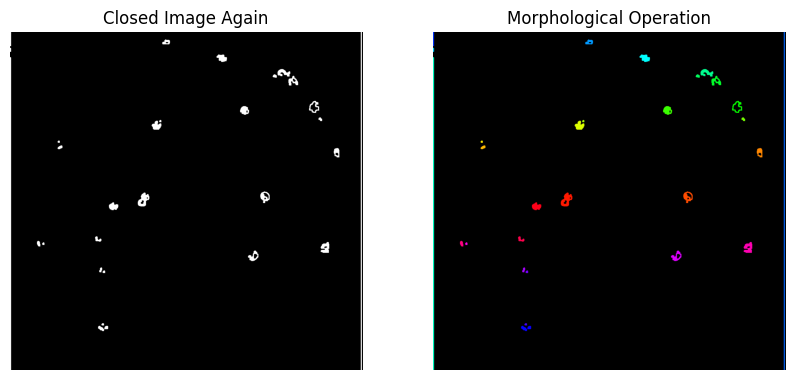

In [61]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(closed_img_again, 4, cv2.CV_32S)
label_hue = np.uint8(179 * labels / np.max(labels))
blank_ch = 255 * np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue == 0] = 0

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(closed_img_again, cmap='gray')
plt.title('Closed Image Again')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(labeled_img, cmap='gray')
plt.title("Morphological Operation")
plt.axis('off')
plt.show()

### 6.Soru

#### Area,orientation, circularity hesaplama.

In [55]:
for i in range(1, num_labels):
    
    mask = labels == i
    area = np.sum(mask)

    mask_uint8 = mask.astype(np.uint8) * 255
    contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours and len(contours[0]) >= 5:
        cnt = contours[0]
        ellipse = cv2.fitEllipse(cnt)
        (x, y), (MA, ma), angle = ellipse
        orientation = angle
        perimeter = cv2.arcLength(cnt, True)
        circularity = (4 * math.pi * area) / (perimeter ** 2) if perimeter != 0 else 0

        print(f"Bölge {i}: Alan = {area}, Orientation = {orientation:.2f}, Dairesellik = {circularity:.2f}")
    else:
        print(f"Bölgenin {i}: bir elips sığdırmak için yeterli noktası yok.")

Bölgenin 1: bir elips sığdırmak için yeterli noktası yok.
Bölgenin 2: bir elips sığdırmak için yeterli noktası yok.
Bölge 3: Alan = 194, Orientation = 57.44, Dairesellik = 0.74
Bölge 4: Alan = 32, Orientation = 176.44, Dairesellik = 0.73
Bölge 5: Alan = 381, Orientation = 111.24, Dairesellik = 0.70
Bölge 6: Alan = 2507, Orientation = 179.97, Dairesellik = 0.01
Bölge 7: Alan = 408, Orientation = 98.16, Dairesellik = 0.35
Bölge 8: Alan = 77, Orientation = 103.63, Dairesellik = 0.99
Bölge 9: Alan = 361, Orientation = 147.99, Dairesellik = 0.39
Bölge 10: Alan = 339, Orientation = 10.30, Dairesellik = 0.35
Bölge 11: Alan = 406, Orientation = 125.07, Dairesellik = 0.83
Bölge 12: Alan = 70, Orientation = 129.53, Dairesellik = 0.90
Bölge 13: Alan = 31, Orientation = 135.00, Dairesellik = 1.25
Bölge 14: Alan = 408, Orientation = 5.08, Dairesellik = 0.63
Bölge 15: Alan = 31, Orientation = 135.00, Dairesellik = 1.25
Bölge 16: Alan = 92, Orientation = 63.97, Dairesellik = 0.89
Bölge 17: Alan = 270

### 7.Soru

####    Edge Detection ,Compactness Ve Alanın Çevreye Oranı

Bölge 1: Çevre = 78.0, Kompaktlık = 0.012163050624589087
Bölge 2: Çevre = 1808.0, Kompaktlık = 0.0005518736784399718
Bölge 3: Çevre = 57.55634891986847, Kompaktlık = 0.05569419063862018
Bölge 4: Çevre = 23.41421353816986, Kompaktlık = 0.035569311739501876
Bölge 5: Çevre = 82.87005734443665, Kompaktlık = 0.04987297749961783
Bölge 6: Çevre = 1673.4142135381699, Kompaktlık = 0.000596182901728396
Bölge 7: Çevre = 121.25483298301697, Kompaktlık = 0.0240091392167938
Bölge 8: Çevre = 31.313708305358887, Kompaktlık = 0.06322992782723193
Bölge 9: Çevre = 107.35533833503723, Kompaktlık = 0.030585235680516777
Bölge 10: Çevre = 109.94112479686737, Kompaktlık = 0.045916907573225994
Bölge 11: Çevre = 78.28427076339722, Kompaktlık = 0.06282199280899173
Bölge 12: Çevre = 31.313708305358887, Kompaktlık = 0.056091065008028324
Bölge 13: Çevre = 17.656854152679443, Kompaktlık = 0.07056608465999349
Bölge 14: Çevre = 90.5269113779068, Kompaktlık = 0.044721727650779156
Bölge 15: Çevre = 17.656854152679443, K

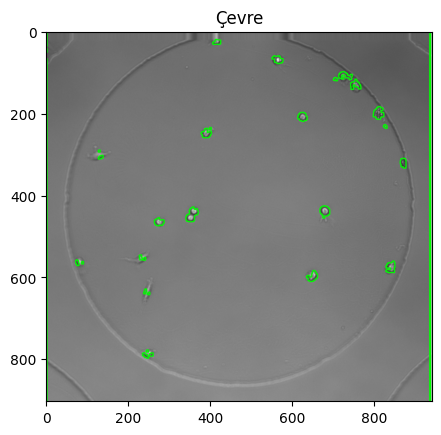

In [56]:
for i in range(1, num_labels):
    mask = np.uint8(labels == i)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if contours:
        cnt = contours[0]
        perimeter = cv2.arcLength(cnt, True)
        area = cv2.contourArea(cnt)
        compactness = area / (perimeter ** 2) if perimeter != 0 else 0

        print(f"Bölge {i}: Çevre = {perimeter}, Kompaktlık = {compactness}")
        cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Çevre")
plt.show()

### Elde edilen bütün görseller 

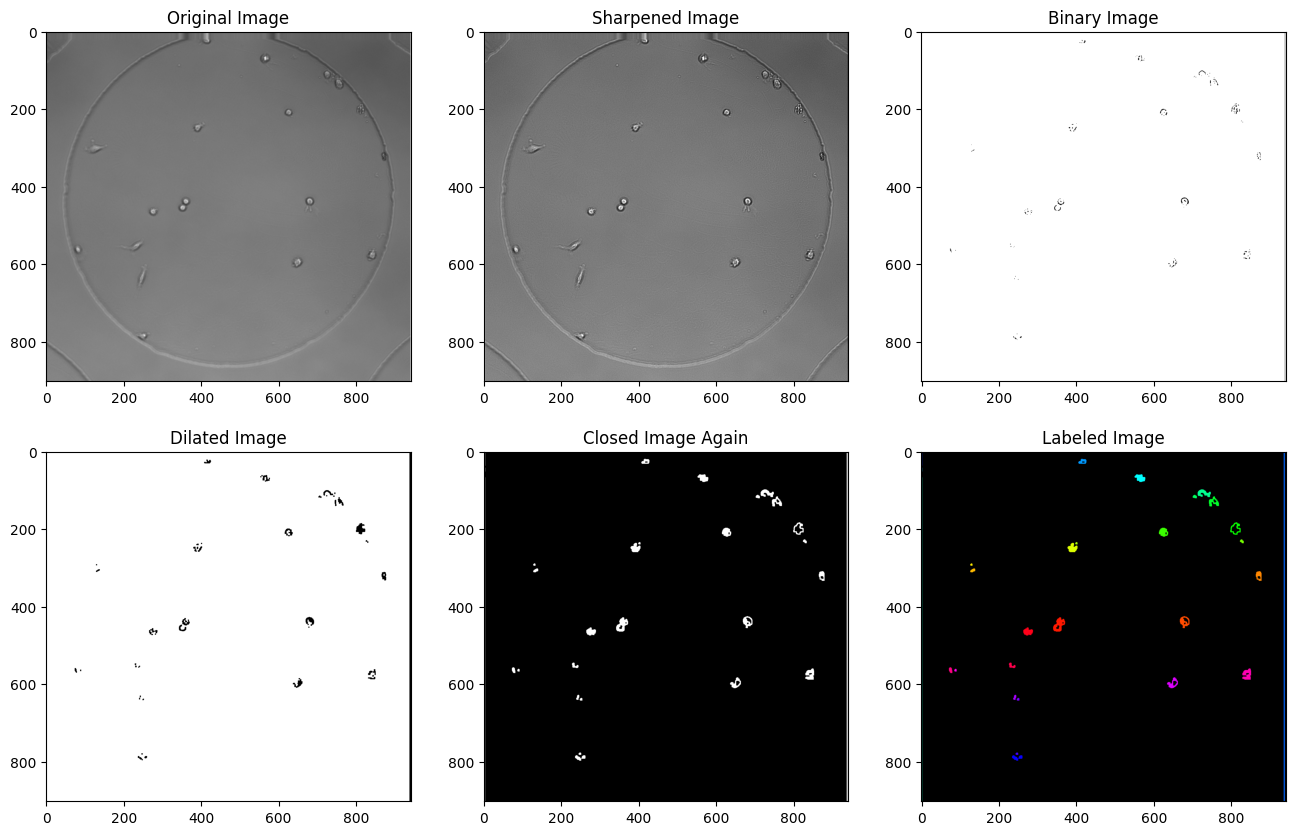

In [57]:
img1 = cv2.imread("/Users/buketcalp/Downloads/FINAL/hucre.png")
plt.figure(figsize=(16, 10))
plt.subplot(231), plt.imshow(img1, cmap='gray'), plt.title('Original Image')
plt.subplot(232), plt.imshow(sharpened_image, cmap='gray'), plt.title('Sharpened Image')
plt.subplot(233), plt.imshow(binary_image, cmap='gray'), plt.title('Binary Image')
plt.subplot(234), plt.imshow(dilated_img, cmap='gray'), plt.title('Dilated Image')
plt.subplot(235), plt.imshow(closed_img_again, cmap='gray'), plt.title('Closed Image Again')
plt.subplot(236), plt.imshow(labeled_img, cmap='gray'), plt.title('Labeled Image')
plt.show()